In [1]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from collections import Counter
from skimage import feature
import seaborn as sb
import pandas as pd
import numpy as np
import cv2

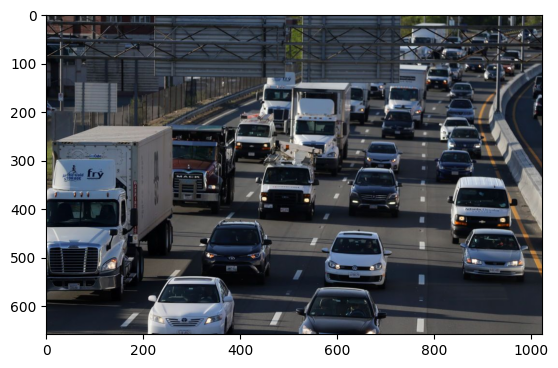

In [75]:
image = cv2.imread('../Images/image8.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)

Counter({1: 174216, 2: 129812, 0: 33380})


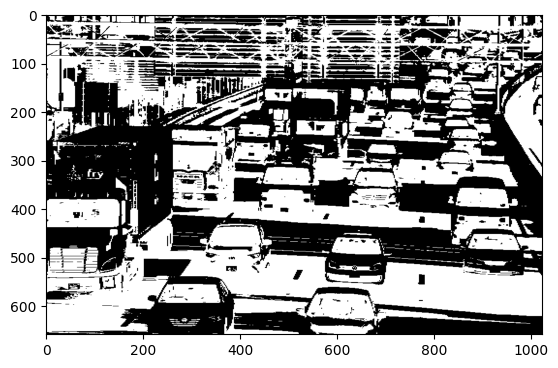

In [83]:
blurred_img = cv2.GaussianBlur(image,(7,7),2)
# plt.imshow(blurred_img)


image_lab = cv2.cvtColor(image , cv2.COLOR_BGR2LAB)
image_hsv = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)

img = []

for i in range(image.shape[0]):
    img.append([])
    for j in range(image.shape[1]):
        img[i].append([image_hsv[i][0],image_hsv[i][1],image_hsv[i][2],image_lab[i][0],image_lab[i][1],image_lab[i][2]])

pixel_values = image.reshape((-1, 6))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)

# labels = cv2.pyrMeanShiftFiltering(pixel_values, 35, 25, termcrit=criteria)

return_val1, labels, centers = cv2.kmeans(data=pixel_values,
                                            K=3,
                                            bestLabels=None,
                                            criteria=(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,1000,0.85),
                                            attempts=10,
                                            flags=cv2.KMEANS_RANDOM_CENTERS)

# Centers have to be of type non negative int
centers = np.uint8(centers)

print(Counter(labels.flatten()))

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))

th , img_gray_thrsh = cv2.threshold(cv2.cvtColor(segmented_image,cv2.COLOR_RGB2GRAY), 0, 255, cv2.THRESH_OTSU)

plt.imshow(img_gray_thrsh,cmap='binary')

In [77]:
img_gray = cv2.cvtColor(labels,cv2.COLOR_RGB2GRAY)

th , img_gray_thrsh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
img_gray_thrsh = cv2.bitwise_not(img_gray_thrsh)
plt.imshow(img_gray_thrsh,cmap='Greys')

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


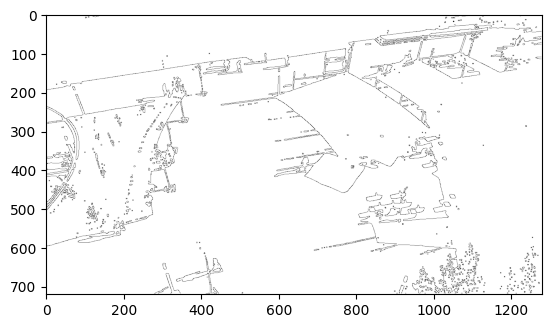

In [22]:
from skimage import feature
edged_img = feature.canny(img_gray_thrsh)
plt.imshow(edged_img,cmap='Greys')

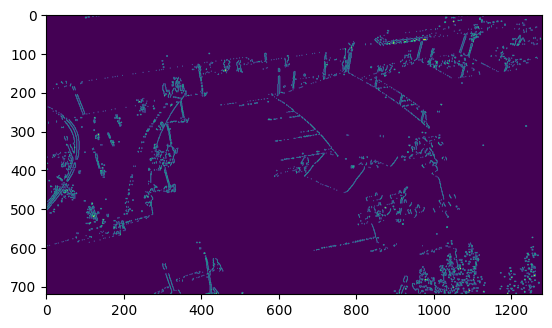

In [78]:
plt.imshow(cv2.GaussianBlur(np.uint8(edged_img),(1,5),0))